# Compolsory Assignment 4: Variational Autoencoders
Please fill out the the group name, number, members and optionally the name below.

**Group number**: 30  
**Group member 1**: Peder Ørmen Bukaasen    
**Group member 2**: Bård Tollef Pedersen  
**Group member 3**: Evind Lid Trøen  
**Group name (optional)**: Pesi Morti  

# Assignment Submission
To complete this assignment answer the relevant questions in this notebook and write the code required to implement the relevant models. It concist of **<u>two tasks</u>**. At the end of each task, there are discussion questions that _must_ be answered. The assignemnt is submitted by handing in this notebook as an .ipynb file and as a .pdf file.

We will explore how to use autoencoder netorks using the datsets **MNIST** (Modified National Institute of Standards and Technology) dataset is a widely used benchmark in machine learning, particularly for tasks related to image classification and computer vision. It consists of 70,000 grayscale images of handwritten digits (0–9), where each image is 28x28 pixels. The dataset is split into 60,000 training examples and 10,000 testing examples.

Autoencoder is an introduction to encoder-decoder architecture. Here we will use an encoder to transform the data into an latent representation, and a decoder to project it back into the visual space.
Two main components: an **encoder** and a **decoder**.
 - The encoder takes in the input data and maps it to a lower-dimensional latent representation. It typically consists of multiple layers that gradually reduce the dimensionality of the input data, capturing its essential features. The output of the encoder is a compressed representation of the input, often referred to as a code or latent vector.
 - The decoder, on the other hand, takes the code from the encoder and reconstructs the original data from it. It mirrors the architecture of the encoder by gradually expanding the code back to the original dimensionality. The output of the decoder is a reconstruction of the input data, which ideally should closely resemble the original input.

<div>
<img src="https://tikz.net/janosh/autoencoder.png" width="300"/>
<div>

---

### **Task 1**
- Load the MNIST dataset.
	- > (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
	- Normalize the images to have pixel values between 0 and 1.
- Build an autoencoder model.
	- The encoder should compress the images into a lower-dimensional latent space.
	- The decoder should reconstruct the images from the latent space.
	- The intermediat layers can either be linear or convolutional.
- Train the autoencoder.
	- Use `binary-cross-entropy` loss function for _reconstruction_ (i.e. target value = input value)
	- You can choose optimizer freely (Adam is recommended).
- Visualize the reconstructed images.
	- _Compare_ original and reconstructed images.
- Visualize the latent space
	- Use PCA to visualize the 2d-latent space.
	- Use the digit as labels
- Answer the discussion questions

In [1]:
# Import necessary libraries
import numpy as np
import seaborn as sns
from re import VERBOSE
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras import layers, Model, optimizers, backend as K

2024-11-13 09:29:49.931554: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/bard/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# 1. Load and preprocess the MNIST dataset
# Your code here
# Load the MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
# 2. Build the autoencoder model
# Your code here
input_img = layers.Input(shape=(28, 28, 1))
e1 = layers.Conv2D(8, 5, activation='relu', padding='same')(input_img)
e2 = layers.MaxPooling2D(2, padding='same')(e1)
e3 = layers.Conv2D(16, 5, activation='relu', padding='same')(e2)
e4 = layers.MaxPooling2D(2, padding='same')(e3)  # (7, 7, 16)

# Flatten and add dense bottleneck layer
flat = layers.Flatten()(e4)
bottleneck = layers.Dense(10, activation='relu')(flat) #392

# Decoder (reshape back to convolutional format)
d1 = layers.Dense(7 * 7 * 16, activation='relu')(bottleneck)  # (7, 7, 16)
d1_reshaped = layers.Reshape((7, 7, 16))(d1)
d2 = layers.Conv2DTranspose(16, 5, activation='relu', padding='same', strides=2)(d1_reshaped)
d3 = layers.Conv2DTranspose(8, 5, activation='relu', padding='same', strides=2)(d2)
decoded = layers.Conv2DTranspose(1, 5, activation='sigmoid', padding='same')(d3)

autoencoder = Model(input_img, decoded)

In [4]:
# 3. Compile and train the autoencoder
# Your code here
opt = optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.summary()

history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 784)               0     

313/313 [==============================] - 6s 18ms/step


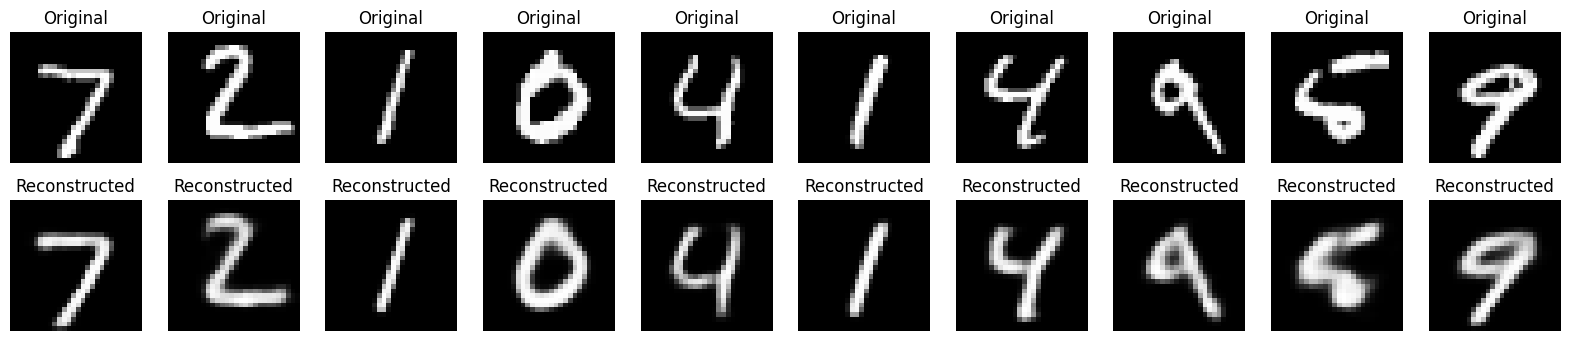

In [5]:
# 4. Visualize the reconstructed images
# Your code here
generated_images = autoencoder.predict(x_test)

# Number of images to display
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

313/313 [==============================] - 2s 7ms/step


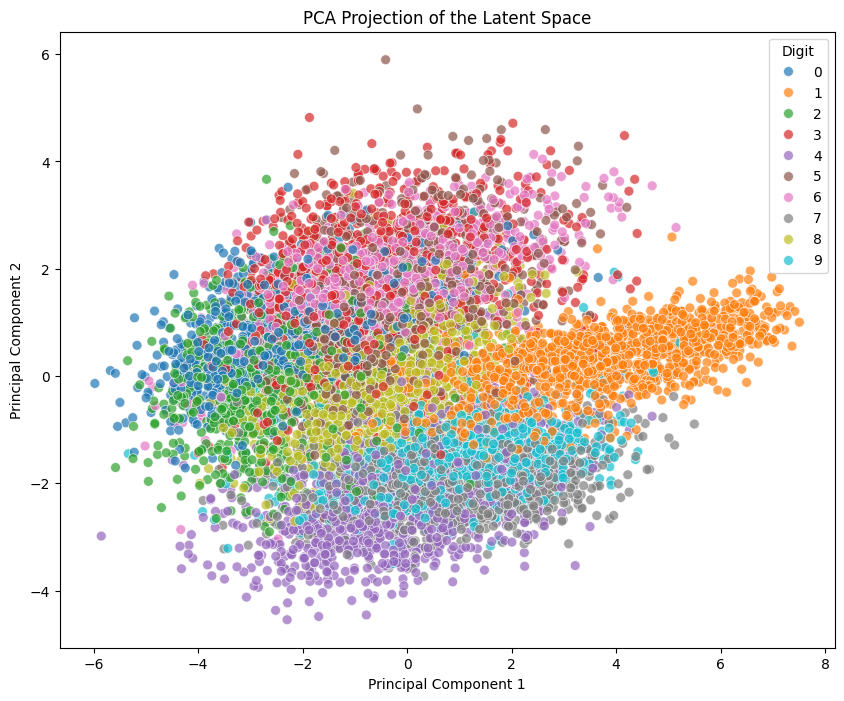

In [6]:
# 4. Visualize the PCA-projection of the latent space. Try to inlcude the labels in the plot for a better understanding of
# the distribution of the latent space.
# Your code here
latent_model = Model(input_img, bottleneck)
latent_representations = latent_model.predict(x_test)

pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_representations)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1], hue=y_test, palette="tab10", s=50, alpha=0.7)
plt.title("PCA Projection of the Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Digit', loc='best')
plt.show()

**Discussion**
1. Why do we normalize the pixel values of the images?
2. How does the size of the latent space affect the reconstructed images?
3. Can autoencoders be used for noise reduction? How?

**Anserws**
1. Normalized data helps the model converge more smoothly and efficiently because the gradient updates are more stable. This also means that the model train faster and minimizes the likelihood of vanishing or exploding gradients.  

2. The size of the latent space affects the reconstructed images by determining how much information is retained in the compressed representation. A larger latent space will retain more information, but it may also lead to overfitting. A smaller latent space will lose some information, but it may also lead to underfitting.

3. Autoencoders can be used for noise reduction by using a small latent space to compress the input data and then reconstructing it. The model will learn that noise is less important and construct the image without the noise.

___
### **Task 2**

In contrast to simple autoencoders, which aim to learn a deterministic mapping from input data to a compressed latent space and back, **Variational Autoencoders (VAEs)** introduce a probabilistic approach to the latent space. While simple autoencoders can reconstruct data effectively, they are not inherently capable of generating new, realistic data samples. VAEs, on the other hand, are designed for _both reconstruction and generation_ of novel data samples, making them highly useful for generative modeling tasks.

**Why VAEs?** A simple autoencoder maps input data to a fixed point in the latent space, meaning that each input has a single corresponding latent vector. While this approach works well for compression and reconstruction, it lacks the ability to generalize and generate new data points because the latent space is not continuous or well-structured.

In contrast, a Variational Autoencoder treats the latent space probabilistically. Instead of mapping each input to a single point, it maps inputs to a distribution (typically a Gaussian distribution) in the latent space. This probabilistic treatment allows for the generation of new samples by sampling from the learned distribution, thus enabling the model to create *new*, unseen data points that resemble the training data.

**How VAEs Work?** In a VAE, the _encoder_ maps the input data to <u>two</u> vectors: a _mean vector_ and a _variance (or log variance) vector_ (in contrast to one as in a traditional AE). These vectors representing a Gaussian distribution in the latent space. Instead of encoding to a fixed point, the model <u>samples</u> a latent vector from this distribution, using these mean and variance parameters. This sampling introduces variability, allowing the VAE to explore different parts of the latent space and generate diverse outputs.

The _decoder_ then reconstructs the data by decoding from the sampled latent vector, which can either come from the encoded input or be randomly generated. This process makes VAEs ideal for generating novel data samples in applications like image generation.

**The loss function?** The loss function plays a crucial role in training the model to both reconstruct input data and ensure that the latent space is properly structured. The VAE loss function consists of two main components:

1. Reconstruction Loss: Measures how well the VAE is able to reconstruct the input data from the latent space. Typically, this is computed using binary cross-entropy (for normalized image data) or mean squared error (for continuous data). For images, binary cross-entropy is often used.

$$\mathcal{L}{\text{reconstruction}}(x, \hat{x}) = - \sum{i=1}^{N} \left[ x_i \log(\hat{x}_i) + (1 - x_i) \log(1 - \hat{x}_i) \right]$$

Where:
$x_i$  is the original data point (e.g., pixel value).
$\hat{x}_i$  is the reconstructed data point.
$N$  is the number of data points or pixels.

2. KL Divergence Loss: is used to ensure that the learned latent distribution  $q(z|x)$, parameterized by  $\mu$  and  $\sigma^2$, is close to a standard normal distribution  $p(z) = \mathcal{N}(0, I)$.

$$\mathcal{L}{\text{KL}}(q(z|x) \parallel p(z)) = \frac{1}{2} \sum{j=1}^{d} \left( 1 + \log(\sigma_j^2) - \mu_j^2 - \sigma_j^2 \right)$$
Where:
 $\mu_j$  is the mean of the latent variable distribution. $\sigma_j^2$  is the variance of the latent variable distribution. $d$  is the dimensionality of the latent space.

_Total Loss Function_ The total loss function for a VAE is the sum of the reconstruction loss and the KL divergence loss:
$$\mathcal{L}{\text{VAE}} = \mathcal{L}{\text{reconstruction}} + \mathcal{L}_{\text{KL}}$$


**The Role of KL Divergence** A crucial aspect of training VAEs is ensuring that the latent space is well-structured and that the learned distributions align with a _prior distribution_ (typically a standard normal distribution). This is where the _Kullback-Leibler (KL) divergence loss_ comes in. KL divergence measures how different the learned distribution is from the desired prior distribution. By minimizing KL divergence during training, the VAE ensures that the latent space follows a continuous, smooth distribution, making it easier to generate realistic new samples by sampling from this space.

In summary, VAEs combine the strengths of autoencoders for reconstruction with a probabilistic latent space, enabling the generation of new data samples and ensuring smooth interpolation within the latent space through the use of KL divergence. This combination makes VAEs a powerful generative model in unsupervised learning tasks.

<div>
<img src="https://tikz.net/janosh/vae.png" width="350"/>
<div>

Run the following code

In [7]:
# Load the MNIST dataset.
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = x_test.astype('float32') / 255.0
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [8]:
latent_dim = 2  # Dimensionality of the latent space (small for simplicity)
input_shape = (28, 28, 1)  # Input image shape

In [9]:
# We define the encoder in a similar way as the autoencoder
input_img = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

In [10]:
# However, instead of a single output layer to the latent space, we have two output layers (latent space parameters: mean (mu) and log variance (log_var))
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [11]:
# We define a sampling function to sample from the latent space, which introduces stochasticity in the model and helps in training (as it still alows gradients to flow backwards)
# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [12]:
# There are multiple ways to sample from the latent space, here I introduce a Lambda layer, which allows to use arbitrary functions as layers in the model
# Note the output shape of the Lambda layer; we are returning the (sampled) latent space, and the learned parameters (mean and log variance)- these are used in the loss function
z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [13]:
# The decoder is defined in the same way as the autoencoder
decoder_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoded_img = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

In a Variational Autoencoder (VAE), adjusting the weight of the KL divergence loss controls the balance between data reconstruction accuracy and latent space regularization. Increasing the weight encourages a more structured and continuous latent space but may reduce reconstruction quality, while decreasing it improves reconstruction but risks losing meaningful structure in the latent space.

In [14]:
#KL divergence loss weight. This is a hyperparameter that can be tuned, run ALL cells below to see the effect of different values.
# This is the value you should experiment with
KL_weight = 1

In [15]:
# Having build our layers, we can now define the models
encoder = Model(input_img, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_input, decoded_img, name='decoder')

# VAE model that connects the encoder and decoder
vae_output = decoder(encoder(input_img)[2])
vae = Model(input_img, vae_output, name='vae')

In [16]:
# VAE loss: Reconstruction loss + KL divergence
reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(K.flatten(input_img), K.flatten(vae_output)))
reconstruction_loss *= 28 * 28

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = -0.5 * K.sum(kl_loss, axis=-1)
vae_loss = K.mean(reconstruction_loss + KL_weight*kl_loss)

In [17]:
# Train the VAE
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train, epochs=20, batch_size=128, validation_data=(x_test, None), verbose=1)

Epoch 1/20
469/469 [==============================] - 217s 457ms/step - loss: 219.5416 - val_loss: 194.3716
Epoch 2/20
469/469 [==============================] - 151s 321ms/step - loss: 185.1224 - val_loss: 175.1020
Epoch 3/20
469/469 [==============================] - 174s 372ms/step - loss: 170.5801 - val_loss: 167.4214
Epoch 4/20
469/469 [==============================] - 177s 377ms/step - loss: 165.7678 - val_loss: 164.1357
Epoch 5/20
469/469 [==============================] - 177s 378ms/step - loss: 163.1497 - val_loss: 162.1574
Epoch 6/20
469/469 [==============================] - 154s 328ms/step - loss: 161.3941 - val_loss: 160.4661
Epoch 7/20
469/469 [==============================] - 170s 362ms/step - loss: 160.0727 - val_loss: 159.3197
Epoch 8/20
469/469 [==============================] - 170s 363ms/step - loss: 158.9735 - val_loss: 158.3226
Epoch 9/20
469/469 [==============================] - 147s 314ms/step - loss: 157.9652 - val_loss: 159.2422
Epoch 10/20
469/469 [=======

1/1 [==============================] - 0s 27ms/step


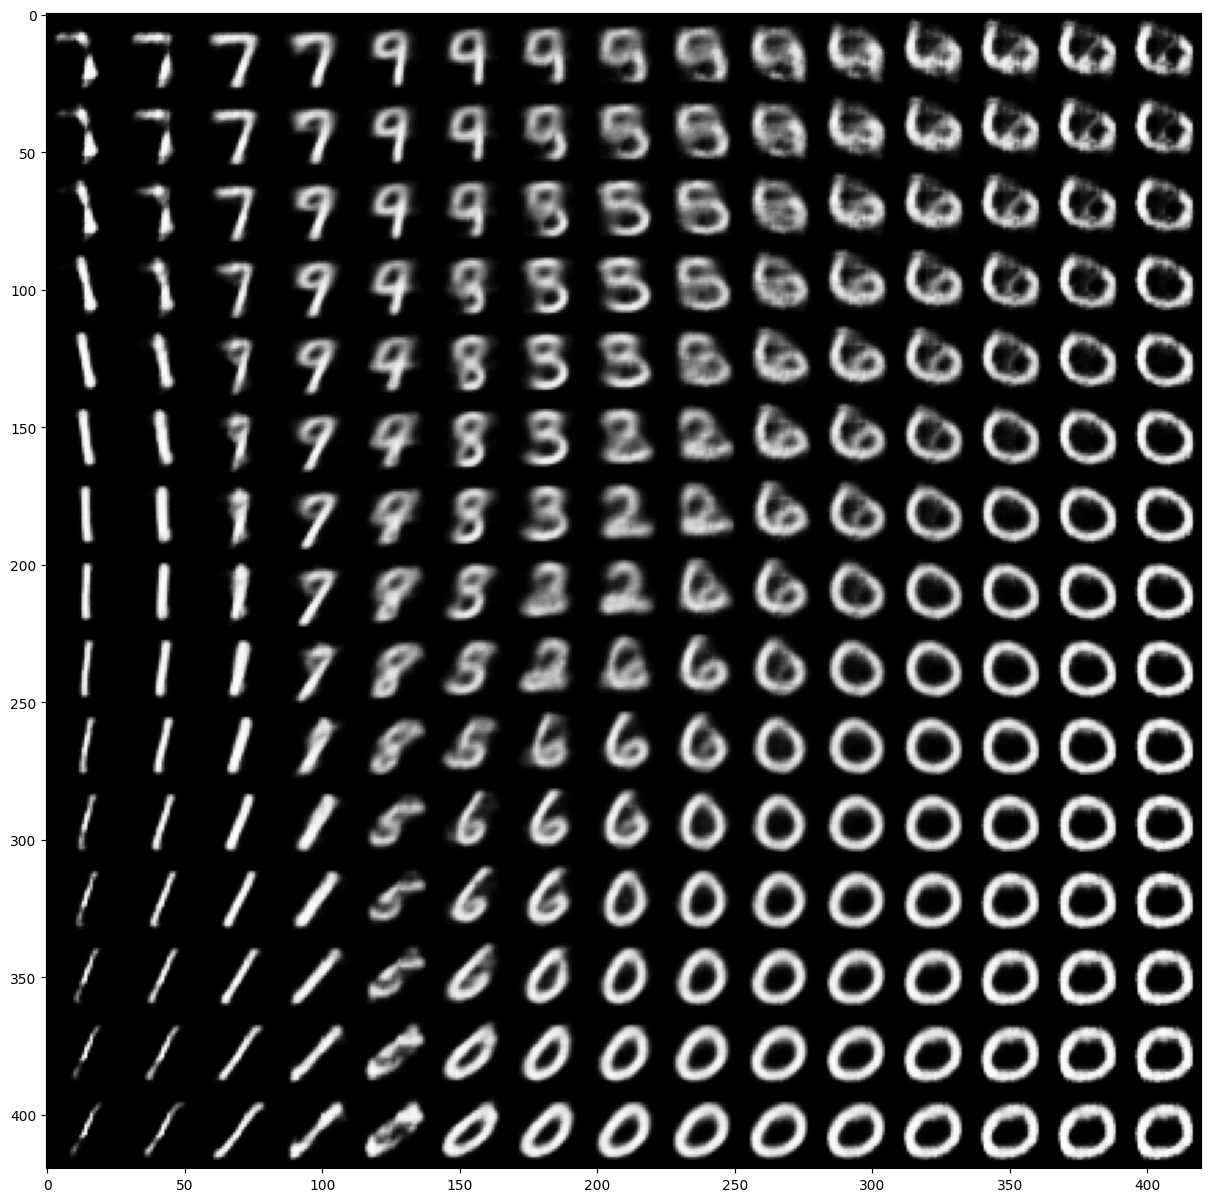

In [18]:
# Run this visualisation code after training the VAE to answere the discussion questions.

def plot_latent_space(decoder, n=15, figsize=15):
    """Plots a grid of digits decoded from the VAE's latent space."""
    scale = 2.0
    figure = np.zeros((28 * n, 28 * n))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(28, 28)
            figure[i * 28: (i + 1) * 28, j * 28: (j + 1) * 28] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

plot_latent_space(decoder)

**Discussion**

Tips; refer to the visualization above and the loss output from your training cell (make sure verbose is set to 1 or 2). to answer the questions.

1. Adjust the weight of the KL divergence term in the VAE loss function (e.g., set it to 0.1, 1, and 5). Run the model with each weight setting and observe the results.
2. Based on your observations, discuss how each change in the KL weight affected the VAE’s performance. Were the effects consistent with your expectations, and why or why not? Consider both the quality of the reconstructions, the loss values, and the continuity of the latent space in your answer.

**Answers**

1.

2. When the KL weight is low, the model primarily minimizes the reconstruction loss, resulting in high-quality reconstructions. The decoder receives stronger signals to accurately reproduce the input images. The KL divergence loss contributes minimally, so the total loss might be relatively low. The latent space may not be well-regularized, meaning clusters might form rather than a continuous Gaussian-like distribution.

0.1 blury

5 also blury

  With a balanced KL weight, the model performs a compromise between reconstruction and latent space regularization. The latent space is more continuous and resembles a standard Gaussian distribution. Interpolations in the latent space yield smooth transitions in the generated images.

  With a high KL weight, the model focuses heavily on maintaining a well-regularized latent space, this comes at the expense of reconstruction quality. The reconstructions appear blurred and lack details. The latent space is well-regularized and closely follows a standard Gaussian distribution, ensuring a continuous space where similar latent representations produce similar outputs.

___